In [2]:
#Importing key modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ast

In [11]:
def parse_coordinates(coord_str):
    fixed = coord_str.replace(' ', ',')
    fixed = fixed.replace('][', '],[')
    return ast.literal_eval(fixed)

#dataset = pd.read_csv('results/look_ahead_experiments/look-ahead-many-values-table.csv', delimiter=',', skiprows=6, header=0)
#dataset = pd.read_csv('results/look_ahead_experiments/look-ahead-new-table.csv', delimiter=',', skiprows=6, header=0)
dataset = pd.read_csv('results/look_ahead_experiments/look-ahead-100-year-table.csv', delimiter=',', skiprows=6, header=0)
#dataset = pd.read_csv('results/look_ahead_experiments/look-ahead-true-table.csv', delimiter=',', skiprows=6, header=0)
#dataset = pd.read_csv('results/look_ahead_experiments/no-SLR-table.csv', delimiter=',', skiprows=6, header=0)
#dataset = pd.read_csv('results/look_ahead_experiments/look-ahead-trues-table.csv', delimiter=',', skiprows=6, header=0)
dataset['farm-coordinates'] = dataset['farm-coordinates'].apply(parse_coordinates)

print(len(dataset))
dataset.head(10)

240300


,[run number],max-alt-cost-coeff,green-org,starting-temp,SLR-rate-0,look-ahead-blue,dev-discount-red,SLR-rate-1,time-btw-buy-blue,blue-org,...,look-ahead-red,profit-threshold-green,max-altitude,red-org,sell-bonus-green,sell-bonus-blue,min-base-cost,[step],farm-coordinates,current-step
0,8,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
1,3,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
2,5,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
3,1,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
4,7,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
5,4,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
6,2,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
7,6,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,0,[],0
8,6,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,1,"[[2, 16]]",1
9,8,2,False,26,0.018,80,0,0.0082,15,False,...,1,0,5,True,1,1,4000,1,"[[7, 34]]",1


In [8]:
dfs = {value: dataset[dataset['look-ahead-red'] == value] for value in dataset['look-ahead-red'].unique()}

In [28]:
final_step_data = dataset[dataset['current-step'] == dataset['current-step'].max()]

# Group by 'look-ahead-red' and calculate the average for 'sum [money] of farm-orgs'
average_money_per_lookahead = final_step_data.groupby('look-ahead-red')['sum [farm-agri-output] of farms'].mean()

# Print the results for each look-ahead value
print("Average 'sum [money] of farm-orgs' at the end of the simulation for each look-ahead-red value:")
for look_ahead, avg_money in average_money_per_lookahead.items():
    print(f"Look-ahead {look_ahead}: Product - {avg_money:.2f}")

Average 'sum [money] of farm-orgs' at the end of the simulation for each look-ahead-red value:
Look-ahead 1: Product - 1034.53
Look-ahead 2: Product - 1265.61
Look-ahead 3: Product - 2066.42
Look-ahead 4: Product - 3238.75
Look-ahead 5: Product - 3802.85
Look-ahead 10: Product - 3953.27
Look-ahead 20: Product - 3954.28
Look-ahead 30: Product - 3974.96
Look-ahead 50: Product - 3971.83


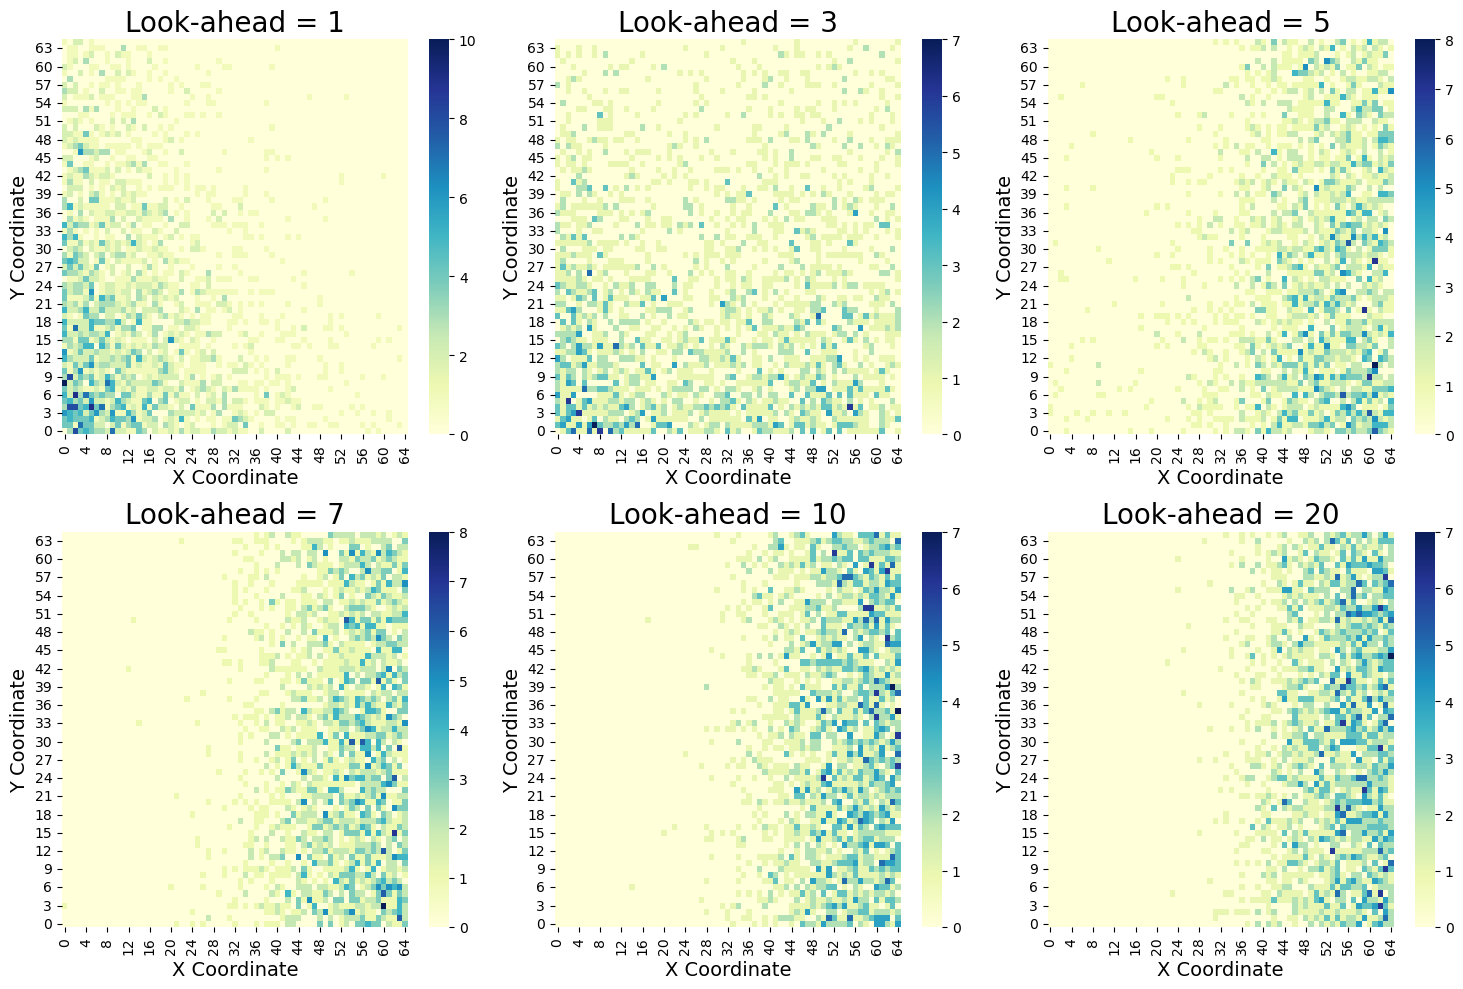

In [14]:
#dataset2 = pd.read_csv('results/look_ahead_experiments/look-ahead-table.csv', delimiter=',', skiprows=6, header=0)
#dataset2['farm-coordinates'] = dataset2['farm-coordinates'].apply(parse_coordinates)
dfs2 = {value: dataset[dataset['look-ahead-red'] == value] for value in dataset['look-ahead-red'].unique()}
df_list = [
    (dfs2[1], 1),
    (dfs2[3], 3),
    (dfs2[5], 5),
    (dfs2[7], 7),
    (dfs2[10], 10),
    (dfs2[20], 20)
]

def plot_heatmap(ax, df, la):
    heatmap = np.zeros((65, 65))
    df_lasts = df[df['current-step'] == 799]

    for _, row in df_lasts.iterrows():
        for coord in row['farm-coordinates']:
            heatmap[coord[1], coord[0]] += 1

    sns.heatmap(heatmap, cmap="YlGnBu", cbar=True, ax=ax)
    ax.set_title(f"Look-ahead = {la}", fontsize=20)  # Larger title
    ax.set_xlabel("X Coordinate", fontsize=14)       # Larger x-axis label
    ax.set_ylabel("Y Coordinate", fontsize=14)       # Larger y-axis label
    ax.tick_params(axis='both', which='major', labelsize=10)  # Larger tick labels
    ax.invert_yaxis()

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each heatmap
for ax, (df, la) in zip(axes, df_list):
    plot_heatmap(ax, df, la)

# Adjust layout and show the grid
plt.tight_layout()
plt.show()


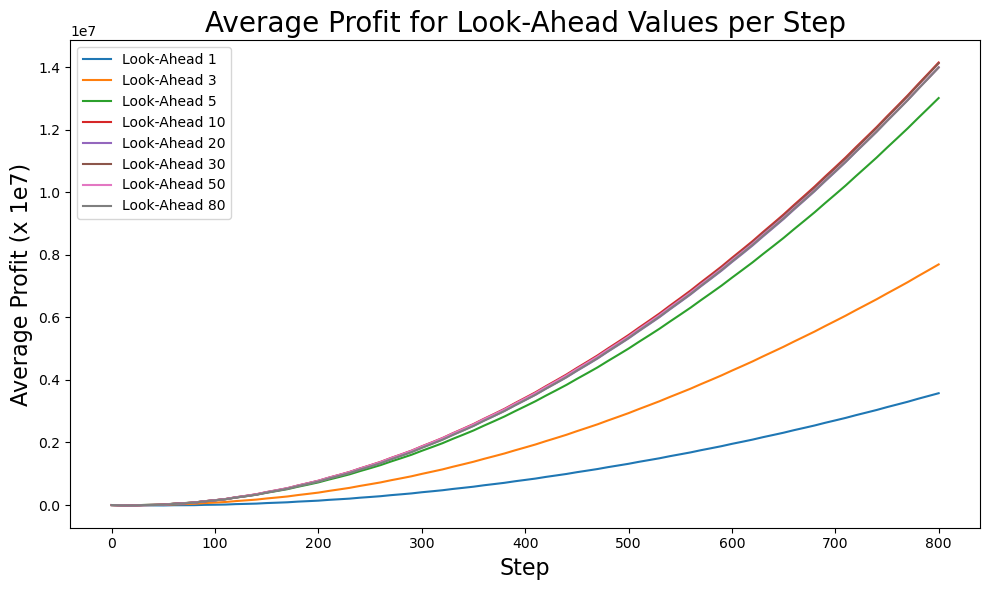

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))

for look_ahead, df in dfs.items():

    df_filtered = df[df['current-step'] % 10 == 0]
    avg_money = df_filtered.groupby('current-step')['sum [money] of farm-orgs'].mean()

    ax1.plot(avg_money.index, avg_money, label=f'Look-Ahead {look_ahead}')

ax1.set_xlabel('Step', fontsize=16)
ax1.set_ylabel('Average Profit (x 1e7)', fontsize=16)

plt.title('Average Profit for Look-Ahead Values per Step', fontsize=20)

ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

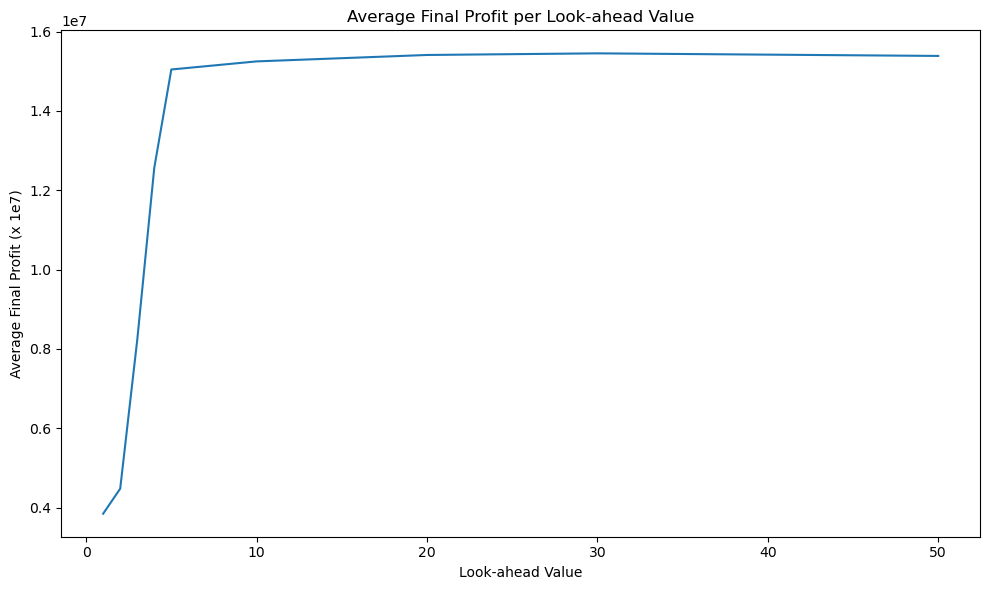

In [32]:
final_values = dataset[dataset['current-step'] == dataset['current-step'].max()]

# Calculate the average final money and agricultural output for each 'look-ahead-red' value
final_money = final_values.groupby('look-ahead-red')['sum [money] of farm-orgs'].mean()
final_agri_output = final_values.groupby('look-ahead-red')['sum [farm-agri-output] of farms'].mean()

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average final money values
ax1.set_xlabel('Look-ahead Value')
ax1.set_ylabel('Average Final Profit (x 1e7)')
ax1.plot(final_money.index, final_money, label='Average Money', color='tab:blue')

# Title and legend
plt.title('Average Final Profit per Look-ahead Value')

# Adjust layout
plt.tight_layout()
plt.show()